In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
idx = 241

data_path = Path('/mnt/f/isee_dataset/12673/input/').glob('*.npz')
data_path = sorted(data_path)

label_path = Path('/mnt/f/isee_dataset/12673/label/').glob('*.npz')
label_path = sorted(label_path)

print(data_path[idx].name)
print(label_path[idx].name)

input_12673_20170906_090000.npz
label_12673_20170906_090000.npz


In [44]:
inputs = np.load(data_path[idx])['input']
inputs = inputs[:, :-1, :-1, :]
inputs = np.clip(inputs, -6000, 6000) / 6000
inputs.shape

(3, 512, 256, 1)

In [45]:
bx = inputs[0, ...]
by = inputs[1, ...]
bz = inputs[2, ...]

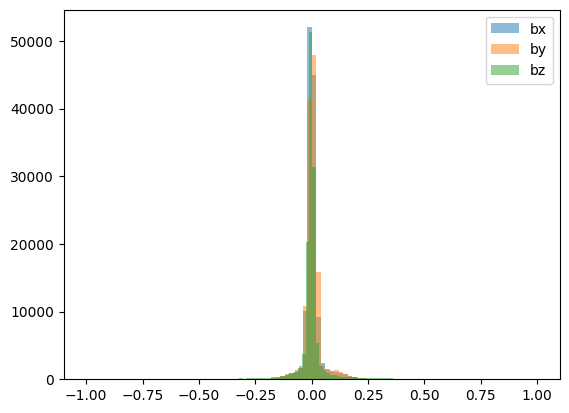

In [46]:
plt.hist(bx.flatten(), bins=100, alpha=0.5, label='bx');
plt.hist(by.flatten(), bins=100, alpha=0.5, label='by');
plt.hist(bz.flatten(), bins=100, alpha=0.5, label='bz');
plt.legend()

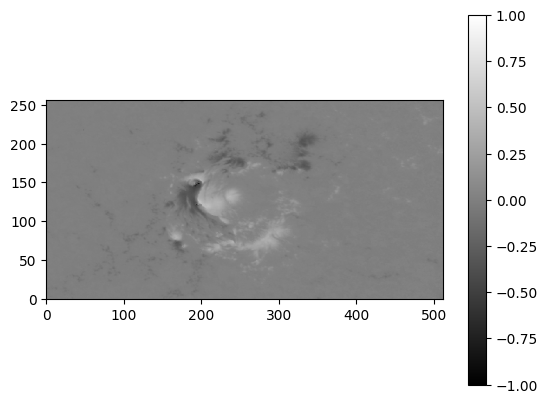

In [47]:
plt.imshow(bz[..., 0].T, origin='lower', cmap='gray', vmin=-1, vmax=1)
plt.colorbar()

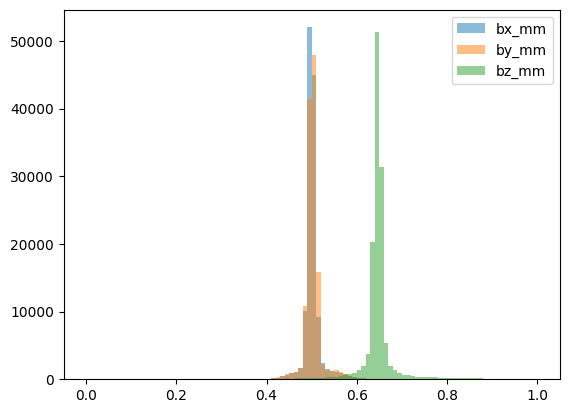

In [48]:
# minmax normalization
bx_mm = (bx - bx.min()) / (bx.max() - bx.min())
by_mm = (by - by.min()) / (by.max() - by.min())
bz_mm = (bz - bz.min()) / (bz.max() - bz.min())

plt.hist(bx_mm.flatten(), bins=100, alpha=0.5, label='bx_mm');
plt.hist(by_mm.flatten(), bins=100, alpha=0.5, label='by_mm');
plt.hist(bz_mm.flatten(), bins=100, alpha=0.5, label='bz_mm');
plt.legend()

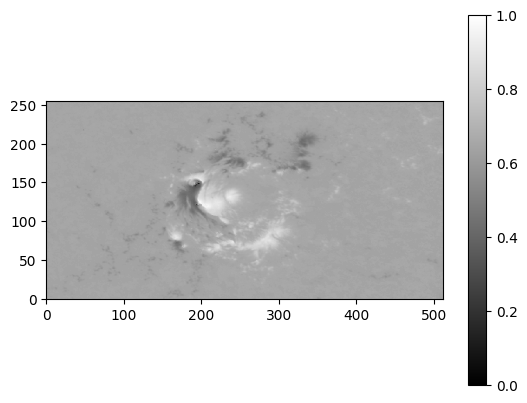

In [49]:
plt.imshow(bz_mm[..., 0].T, origin='lower', cmap='gray')
plt.colorbar()

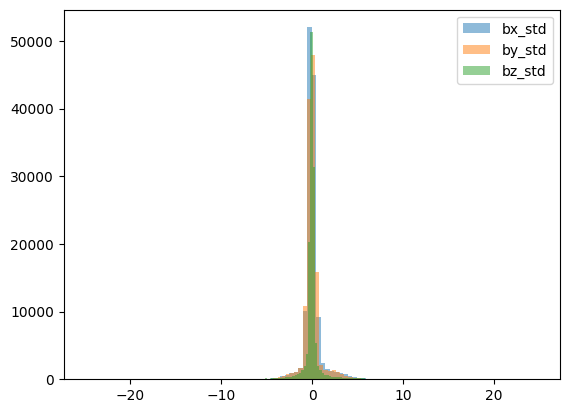

In [50]:
# standardization
bx_std = (bx - bx.mean()) / bx.std()
by_std = (by - by.mean()) / by.std()
bz_std = (bz - bz.mean()) / bz.std()

plt.hist(bx_std.flatten(), bins=100, alpha=0.5, label='bx_std');
plt.hist(by_std.flatten(), bins=100, alpha=0.5, label='by_std');
plt.hist(bz_std.flatten(), bins=100, alpha=0.5, label='bz_std');
plt.legend()

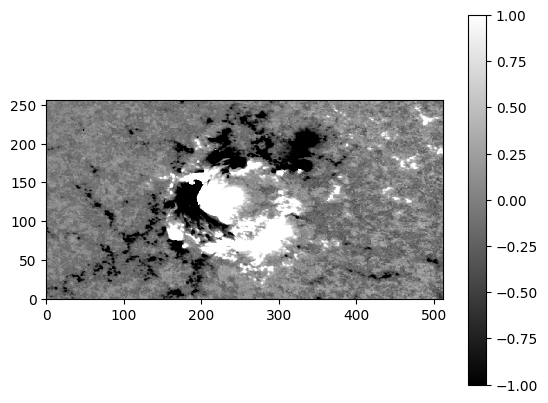

In [51]:
plt.imshow(bz_std[..., 0].T, origin='lower', cmap='gray', vmin=-1, vmax=1)
plt.colorbar()